In [67]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# read data

churn = pd.read_csv('../../data/Churn_Modelling.csv')
churn = churn.iloc[:, 3:]
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# define X and y

X = churn.iloc[:, :10]
y = churn.iloc[:, 10]

In [19]:
# encode categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
X = pd.get_dummies(X, drop_first = True)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
# convert X and y to arrays for nn

y = np.array(y)
X = np.array(X)

In [36]:
# split into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# scale features

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [38]:
# build neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Dense(8, activation = relu))
model.add(Dense(16, activation = relu))
model.add(Dense(32, activation = relu))
model.add(Dense(1, activation = sigmoid))

model.compile(optimizer = Adam(), loss = binary_crossentropy, metrics = ['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2985 - accuracy: 0.8764 - val_loss: 0.3558 - val_accuracy: 0.8620
Epoch 2/100
8000/8000 [==============================] - 0s 38us/step - loss: 0.2979 - accuracy: 0.8758 - val_loss: 0.3568 - val_accuracy: 0.8595
Epoch 3/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.2976 - accuracy: 0.8759 - val_loss: 0.3567 - val_accuracy: 0.8605
Epoch 4/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.2974 - accuracy: 0.8756 - val_loss: 0.3575 - val_accuracy: 0.8630
Epoch 5/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.2979 - accuracy: 0.8746 - val_loss: 0.3562 - val_accuracy: 0.8610
Epoch 6/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.2978 - accuracy: 0.8755 - val_loss: 0.3595 - val_accuracy: 0.8575
Epoch 7/100
8000/8000 [==============================] - 0s 37us/step - loss:

In [52]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > .5)

In [65]:
from sklearn.metrics import confusion_matrix

def plotConfusionMatrix(matrix):
    ax = sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

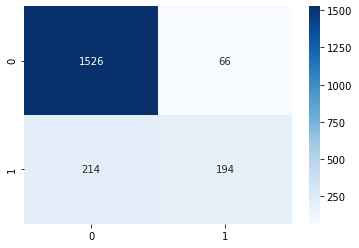

In [66]:
plotConfusionMatrix(confusion_matrix(y_test, y_pred_binary))

In [57]:
def plotLearningCurve(history, epoch):
    
    # plot training & validation accuracy values
    epochs = range(1, epoch + 1)
    plt.plot(epochs, history.history['accuracy'])
    plt.plot(epochs, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()
    
    # plot training & validation loss values
    plt.plot(epochs, history.history['loss'])
    plt.plot(epochs, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()

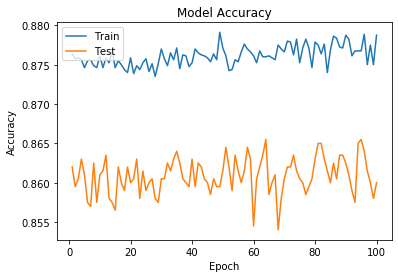

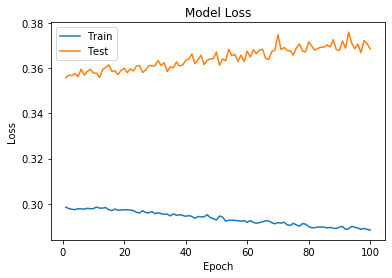

In [58]:
plotLearningCurve(model.history, 100)